## Classification des documents par catégorie (athletics, cricket, football, rugby, tennis)


### Objectif de projet:
Dans ce projet, l’objectif est de développer un modèle qui va prédire la probabilité qu’un document appartienne à une certaine catégorie.

#### Demo: web app deployed on Heroku:   https://classification-article-bbc.herokuapp.com/

### Résumé sur le processus du cycle de vie du projet:

Pour bien analyser et visualiser les données dans le cycle de vie du projet, je préfère de nettoyer les textes (Supprimer les ponctuation et les Stop Words, ..., etc), ensuite visualiser, analyser et explorer les textes. Après l'EDA, je prépare et transforme les données en utilisant les méthodes de Lemmatisation et Tokenization. Dans l'étape de feature engineering, j'ai proposé 3 approches à évaluer pour transformer le texte dans un document en un espace de features. 

Parce qu'on traite un problème de classification critique, j'ai besoin d'un modèle avec des performances élevées. Je vais essayer 5 algorithmes d'apprentissage automatique, dans le but de trouver l'algorithme qui fonctionne le mieux. J'effectuerai une comparaison, basée sur plusieurs métriques, entre les modèles avec les 3 approches TF-IDF, CV, LDA.

À la fin de ce projet, je fournirai les étapes (Code) pour valider la performance du meilleur modèle trouvé sur un sous-ensemble de données cachées

![https://prediction-customer-churn-api.herokuapp.com](BBC--Sport.png)

### Cycle de vie du projet 
#### 1. Collecte et manipulation des données
$\;\;$ 1.1 Chargement des fichiers txt depuis le dossier racine "bbcsport"<br>
$\;\;$ 1.2 Enregistrement des données dans un fichier csv<br>
$\;\;$ 1.3 Chargement de données depuis un fichier csv
#### 2. Nettoyage
$\;\;$ 2.1 Transformer les lettres de texte en minuscules<br>
$\;\;$ 2.2 Supprimer la ponctuation<br>
$\;\;$ 2.3 Supprimer les StopWords
#### 3. Analyse exploratoire des données (EDA)
$\;\;$ 3.1 Explorer la relation des messages avec la cible (sport)<br>
$\;\;$ 3.2 WordClouds pour chaque sport  
#### 4. Préparation avec Transformation (Lemmatization et  Tokenisation)
#### 5. Features engineering
$\;\;$ 5.1 Term Frequency (TF-IDF)<br>
$\;\;$ 5.2 CountVectorizer (CT_VTR)<br>
$\;\;$ 5.3 Latent Dirichlet Allocation (LDA)
#### 6. Développement de modèles
$\;\;$ 6.1 GradientBoostingClassifier<br>
$\;\;$ 6.2 Naive_bayes (GaussianNB)<br>
$\;\;$ 6.3 AdaBoostClassifier<br>
$\;\;$ 6.4 RandomForestClassifier<br>
$\;\;$ 6.5 Xgboost
#### 7. Implémentation du réglage des hyperparamètres pour TF-IDF et CT_VTR
$\;\;$ 7.1 Réglage des hyperparamètres TF-IDF<br>
$\;\;$ 7.2 Réglage CountVectorizer hyperparamètres CT_VTR <br>
$\;\;$ 7.3 Note sur les résultats de l'optimisation des hyperparamètres
#### 8. Code pour la validation sur un sous-ensemble de données cachées

## 1. Collecte et manipulation des données

In [93]:
# Importer les Bibliothèques
import pandas as pd
import numpy as np
import os
import os.path
import re
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [28]:
#!pip install wordcloud

### 1.1 Chargement des fichiers txt depuis le dossier racine "bbcsport"

In [94]:
# Création un dataframe pour un type de7.3 Note sur les résultats de l'optimisation des hyperparamètres sport
def sport_df(Splist, Rpsport, path_sport):
    txt_list = list()
    for txt_file in Splist:
        # Read txt file
        f = open(path_sport+"/"+txt_file, "rb")
        # Ajouter le txt à la liste
        txt_list.append(str(f.read()))
        #print(f.read())
    df = pd.DataFrame({"sport": Rpsport, "text": txt_list})
    return df

In [95]:
# Création un dataframe pour tout les types de sport
def creation_df(racine):
    # Dataframe vide (df résultat) 
    df_res = pd.DataFrame({"sport": [], "text": []})

    # path de répertoire bbcsport
    path_bbcsport = os.getcwd()+"/"+racine
    #print(" path racine:",path_2-Copy1bbcsport)

    # Liste des répertoires dans le répertoir bbcsport
    repertoires_sport_list = os.listdir(path_bbcsport)
    #print("\n répertdf_resoires_sport_list:", repertoires_sport_list, ":\n" ) 

    # Lister le contenu de chaque réperoire dans le répertocreate a ire "bbcsport" 
    for repertoire_sport in repertoires_sport_list:
        # Path de chaque répertoire (type de sport)
        path_sport = path_bbcsport+"/"+repertoire_sport
        # Afficher le contenu de chaque répertoire de type directory 
        if os.path.isdir(path_sport):
            #print("\n Répertoire :", repertoire_sport, "\n" )  
            # Lister tout les nom de tout les fichiers txt dans chaque répertoire
            sport_list = os.listdir(path_sport)
            #print(sport_list)
            # Lire chaque fichier dans un répertoire de sport
            data = sport_df(sport_list, repertoire_sport, path_sport)
            # Concat les données avec df_res    
            df_res = pd.concat([df_res, data])

    # remplacer b' par un vide
    df_res['text'] = df_res['text'].map(lambda x: x.replace("b'",""))
    # rest index tp
    df_res.reset_index( drop= True, inplace=True)
    
    return df_res

In [96]:
# Chargement des fichier text depuis le dossier racine "bbcsport" et Affichage des données "df_res"  
dossier_racine = "bbcsport"
df_res = creation_df(dossier_racine)
df_res.head()

,sport,text
0,tennis,Hantuchova in Dubai last eight\n\nDaniela Hant...
1,tennis,Clijsters could play Aussie Open\n\nKim Clijst...
2,tennis,Parmar ruled out of Davis Cup tie\n\nA knee in...
3,tennis,Federer wins title in Rotterdam\n\nWorld numbe...
4,tennis,Federer forced to dig deep\n\nTop seed Roger F...


In [97]:
# Le nombre d'échantillons pour chaque type de sport
df_res.sport.value_counts()

football     265
rugby        147
cricket      124
athletics    101
tennis       100
Name: sport, dtype: int64

In [98]:
# Informations sur nos données
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sport   737 non-null    object
 1   text    737 non-null    object
dtypes: object(2)
memory usage: 11.6+ KB


### 1.2 Enregistrement des données dans un fichier csv

#### Shuffle / Enregistrer les données dans un fichier csv

In [99]:
# Shuffle DataFrame rows
df_final = df_res.sample(frac=1, random_state=42).reset_index(drop=True)
df_final.to_csv("data_BBCSport_text.csv", index=False)

Objectif: garder une trace

### 1.3 Chargemenet de données depuis un fichier csv

In [100]:
df = pd.read_csv("data_BBCSport_text.csv")
df.head()

,sport,text
0,cricket,Cricket coach moves on after tsunami\n\nWhen t...
1,tennis,Veteran Martinez wins Thai title\n\nConchita M...
2,athletics,Kenteris denies faking road crash\n\nGreek spr...
3,rugby,Taylor poised for Scotland return\n\nSimon Tay...
4,football,Edu describes tunnel fracas\n\nArsenal\'s Edu ...


## 2. Nettoyage

### 2.1 Transformer les lettres de texte en minuscules

In [101]:
df["text_nettoyer"] = df["text"].map(lambda x: x.lower())
df["text_nettoyer"][2]

'kenteris denies faking road crash\\n\\ngreek sprinter kostas kenteris has denied claims that he faked a motorbike crash to avoid a doping test days before the start of the olympics.\\n\\nkenteris and fellow sprinter katerina thanou are set to learn if they will face criminal charges this week. part of the investigation has centred on whether they staged the crash. kenteris insisted: "the accident happened. i went crazy when i found out i had supposedly missed a test and i wanted to rush to the olympic village." kenteris, speaking on greece\\\'s alter television station, also claimed that he asked to be tested for banned substances in hospital after the crash. "i told the hospital, which was an olympics-accredited hospital, to call the ioc and have me tested on the spot but no-one came."\\n\\nafter a drama which dominated newspaper headlines in greece as athens prepared for the start of the athens games, kenteris and thanou eventually withdrew. but kenteris has continually protested hi

### 2.2 Supprimer la ponctuation

In [102]:
import re
import string 

# Remplacement de la ponctuation basée sur des opérations d'expressions régulières
df["text_nettoyer"] = df['text_nettoyer'].map(lambda x: re.sub(r'\'|\\n\\n| n |\\n|\\|-',' ',x))

# Remplacer deux espaces par un seul espace
df["text_nettoyer"] = df['text_nettoyer'].map(lambda x: x.replace('  ', ' '))

# Supprimer la ponctuation basée sur string.punctuation (string.punctuation == !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)
df["text_nettoyer"] = df["text_nettoyer"].map(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

df.head(5)

,sport,text,text_nettoyer
0,cricket,Cricket coach moves on after tsunami\n\nWhen t...,cricket coach moves on after tsunami when the ...
1,tennis,Veteran Martinez wins Thai title\n\nConchita M...,veteran martinez wins thai title conchita mart...
2,athletics,Kenteris denies faking road crash\n\nGreek spr...,kenteris denies faking road crash greek sprint...
3,rugby,Taylor poised for Scotland return\n\nSimon Tay...,taylor poised for scotland return simon taylor...
4,football,Edu describes tunnel fracas\n\nArsenal\'s Edu ...,edu describes tunnel fracas arsenal s edu has ...


### 2.3 Supprimer les StopWords 

In [38]:
#!pip install langdetect

In [103]:
# pour la détection de la langue
import langdetect 

dtf = df["text"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")

print("Les langues utilisées dans tous les textes:")
dtf.value_counts()

Les langues utilisées dans tous les textes:


en    737
Name: text, dtype: int64

#### Note :
Nous remarquons que seulement la langue anglaise (en) est utilisée dans tous les textes. Dans la suppression du mot d'arrêt, nous n'utiliserons que la langue anglaise.

In [104]:
# stop words
from nltk.corpus import stopwords
import nltk

#nltk.download("stopwords")
mots_stop = stopwords.words('english')
print(mots_stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [105]:
# Calculer le nombre de stopwords sur chaque ligne
def nombre_stopwords(x):
    words = x.split()
    lis = list()
    for word in words:
        exist= [x_stp for x_stp in mots_stop if word in x_stp]
        lis.append(exist)
    return len(lis)
        

nombre__stp = df["text_nettoyer"].map(lambda x: nombre_stopwords(x))
nombre__stp

0      511
1      144
2      292
3      322
4      231
      ... 
732    205
733    194
734    207
735    400
736    400
Name: text_nettoyer, Length: 737, dtype: int64

In [106]:
# Supprimer les stopwords
df["text_nettoyer"] = df["text_nettoyer"].map(lambda x: " ".join([mot for mot in x.split() if not mot in mots_stop])) 

# Vérification de la suppression des stopwords
df["text_nettoyer"][0]

'cricket coach moves tsunami tsunami crashed onto sri lankan coastline cricket coach stephen jones middle catching practice within minutes entire playing area galle stadium covered water jones boys harrow school team made safety time thousands lucky almost month later jones still coming terms experience must whilst concentrating next coaching assignment prepare south african team women world cup starting march jones admits memory events galle still blur told bbc sport half hour starting game warming fortunately fielding drills right front pavilion anywhere else field would trouble remember level noise going colleague wife daughter screamed us watch told remember one locals came told get field probably took five minutes maybe 10 minutes water get five metres deep harrow party took refuge viewing area next changing rooms proved high enough boys terrified terrified also amazingly calm said jones thought afterwards one panicked might set domino effect could trouble happened beginning tour 

## 3. Analyse exploratoire des données (EDA)

In [107]:
# Copy df
data = df.copy()

# Calculer la longueur des textes
data["longueur_txt"] = data["text_nettoyer"].str.len()

# Calculer le nombre de mots pour chaque texte
data["nombre_mot"] = data["text_nettoyer"].map(lambda x: len(str(x).split()))

# Calculer la moyenne des mots pour chaque texte
def mean_text(x):
    mean_word = sum([len(word) for word in x]) / len(x)
    return np.round(mean_word,0)

data["mean_mot"] = data["text_nettoyer"].map(lambda x: mean_text(str(x).split()))

data.head(5)

,sport,text,text_nettoyer,longueur_txt,nombre_mot,mean_mot
0,cricket,Cricket coach moves on after tsunami\n\nWhen t...,cricket coach moves tsunami tsunami crashed on...,1595,239,6.0
1,tennis,Veteran Martinez wins Thai title\n\nConchita M...,veteran martinez wins thai title conchita mart...,511,83,5.0
2,athletics,Kenteris denies faking road crash\n\nGreek spr...,kenteris denies faking road crash greek sprint...,1096,152,6.0
3,rugby,Taylor poised for Scotland return\n\nSimon Tay...,taylor poised scotland return simon taylor nam...,1443,218,6.0
4,football,Edu describes tunnel fracas\n\nArsenal\'s Edu ...,edu describes tunnel fracas arsenal edu lifted...,839,124,6.0


### 3.1 Explorer la relation des messages avec la cible (sport)

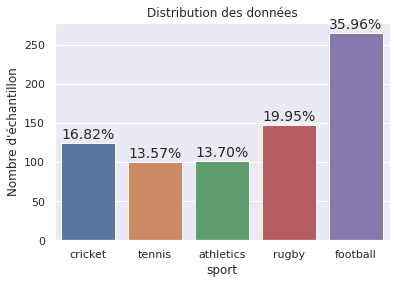

In [108]:
# Tracer la distribution de la cible "sport"
sns.set()
sns.countplot(data.sport).set_title('Distribution des données')
ax = plt.gca()
total_len = len(data["sport"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("sport") 
ax.set_ylabel("Nombre d'échantillon")
plt.show()

À partir de ce graphique, nous pouvons voir qu'il y a plus d'échantillons avec l'étiquette de football (35,96 $ \% $) par rapport à d'autres types de sport. Sur la base de ces résultats, nous pouvons conclure que la base de données est déséquilibrée.

In [109]:
# Texte moyen pour chaque sport
data.groupby(["sport"])["longueur_txt"].mean()

sport
athletics    1235.960396
cricket      1537.524194
football     1297.449057
rugby        1444.829932
tennis       1081.340000
Name: longueur_txt, dtype: float64

In [110]:
# Fonctions la distribution des textes pour chaque sport
# Fonction deux historgammes
def plot_two_hist(sport, longueur_txt):
    fig, ax =plt.subplots(1,2,figsize=(25,7))
    ax[0].set_xlim([0, 7000])
    ax[1].set_xlim([0, 7000])

    ax[0].set_title("distribution de "+sport[0])
    sns.distplot(data.loc[data["sport"] == sport[0]][longueur_txt], 
                         kde_kws={"label": sport[0]}, bins = 50, ax = ax[0])

    ax[1].set_title("distribution de "+sport[1])                
    sns.distplot(data.loc[data["sport"] == sport[1]][longueur_txt], 
                         kde_kws={"label": sport[1]}, bins = 50, ax = ax[1])

# Fonction un historgamme    
def plot_hist(sport, longueur_txt):
    fig, ax =plt.subplots(1,figsize=(7,5))
    ax.set_xlim([0, 7000])

    ax.set_title("distribution de "+sport)
    sns.distplot(data.loc[data["sport"] == sport][longueur_txt], 
                         kde_kws={"label": sport}, bins = 50, ax = ax)

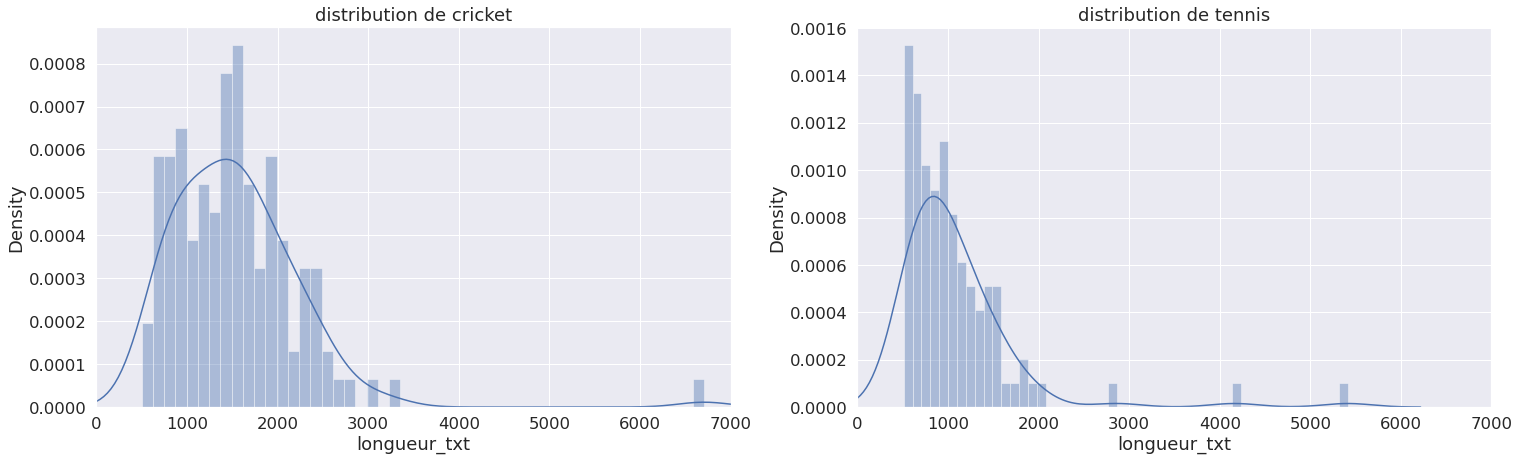

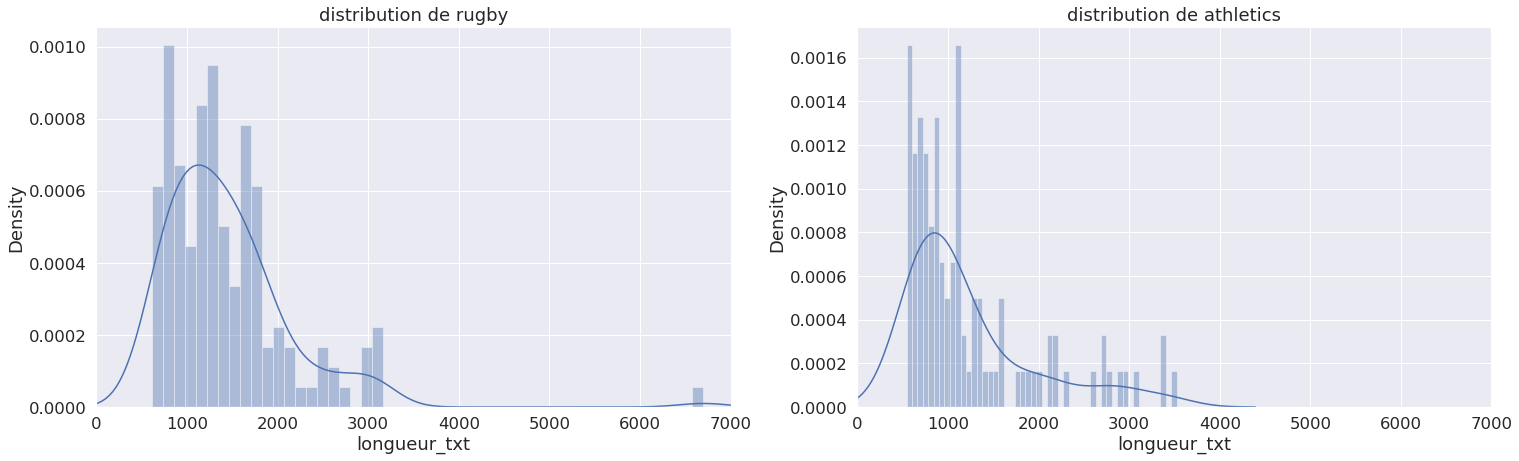

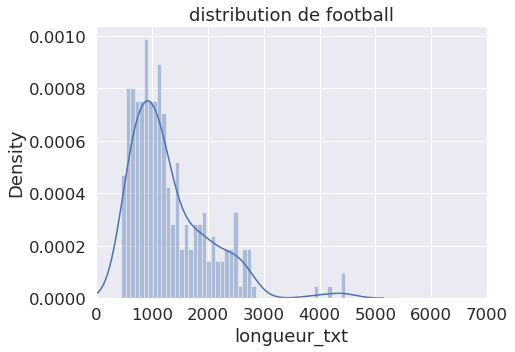

In [111]:
# Tracer la distribution des text pour chaque sport
plot_two_hist(["cricket","tennis"], "longueur_txt")
plot_two_hist(["rugby","athletics"], "longueur_txt")
plot_hist("football", "longueur_txt")

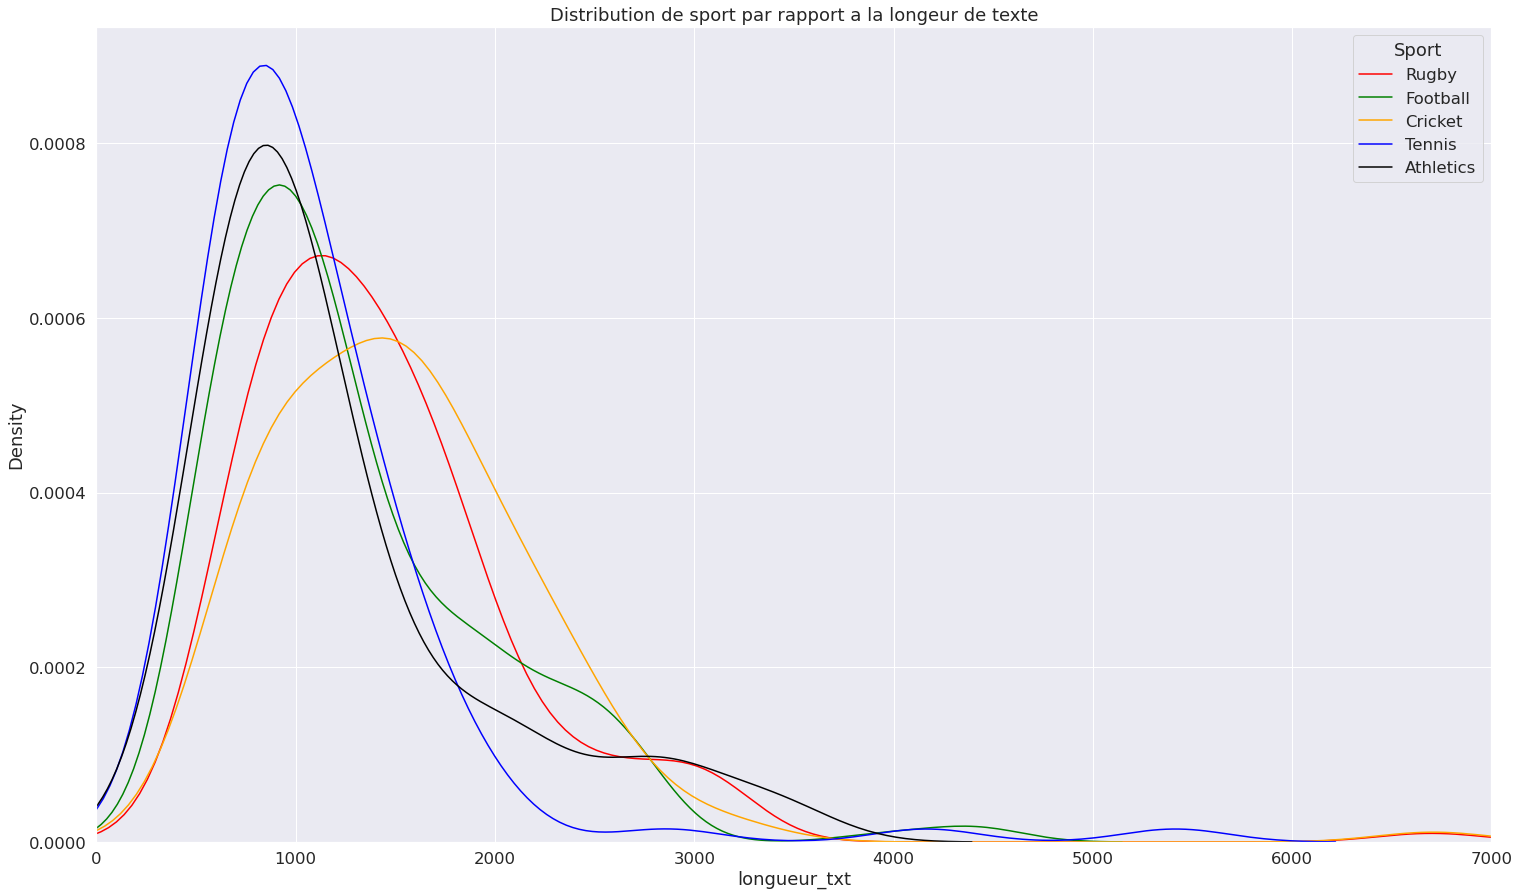

In [112]:
# les histogrammes sports (longeur de textes) ensemble
fig, ax =plt.subplots(1,figsize=(25,15))
ax.set_xlim([0, 7000])

ax.set_title("Distribution de sport par rapport a la longeur de texte")
sns.distplot(data.loc[data["sport"] == "rugby"]["longueur_txt"], hist=False, color="red", 
                         kde_kws={"label": "rugby"}, bins = 50, ax = ax)

sns.distplot(data.loc[data["sport"] == "football"]["longueur_txt"], hist=False, color="green",  
                         kde_kws={"label": "football"}, bins = 50, ax = ax)

sns.distplot(data.loc[data["sport"] == "cricket"]["longueur_txt"], hist=False, color="orange",  
                         kde_kws={"label": "cricket"}, bins = 50, ax = ax)

sns.distplot(data.loc[data["sport"] == "tennis"]["longueur_txt"], hist=False, color="blue", 
                         kde_kws={"label": "tennis"}, bins = 50, ax = ax)

sns.distplot(data.loc[data["sport"] == "athletics"]["longueur_txt"], hist=False, color="black",
                         kde_kws={"label": "athletics"}, bins = 50, ax = ax)

plt.legend(title='Sport', loc='upper right', labels=['Rugby', 'Football', 'Cricket', 'Tennis' , 'Athletics'])
plt.show()

Nous remarquons que la plupart des sports; les distributions de données sont parfaitement biaisées à droite.

Le Rugby (couleur rouge) a des textes plus long que d'autres sports. 

### 3.2 WordClouds pour chaque sport

Si nous devions analyser les textes pour chaque sport et extraire les mots importants en fonction de leur fréquence, nous utilisons la technique " Word Clouds ".

In [113]:
# Tokenization
def tokenz(type_sport):
    mots = ""
    for val in data.loc[data["sport"] == type_sport]["text_nettoyer"]: 
        val = str(val)
        tokens = val.split()
        mots += " ".join(tokens)+" "    
    return mots

# Génération de nuage de mots et et extraire les mots importants en fonction de leur fréquence
def mots_clouds(mots):
    # Téléchargement d'une photo pour l'utiliser dans le nuage de mots 
    pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png'
                                           ,stream=True).raw))
    # Définition du nuage de mots pour un type de sport 
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white', mask = pic, 
                          min_font_size = 10).generate(mots)
    return wordcloud

# Affichage du nuage de mots (les mots les plus fréquents) pour les textes d'un type de sport.
def tracer_wordClouds(wordcloud, type_sport): 
    plt.figure(figsize = (8, 8), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(type_sport)
    plt.show()
    
# fonction principal
def wordClouds(type_sport):
    mots = tokenz(type_sport)
    wordcloud = mots_clouds(mots)
    tracer_wordClouds(wordcloud, type_sport)


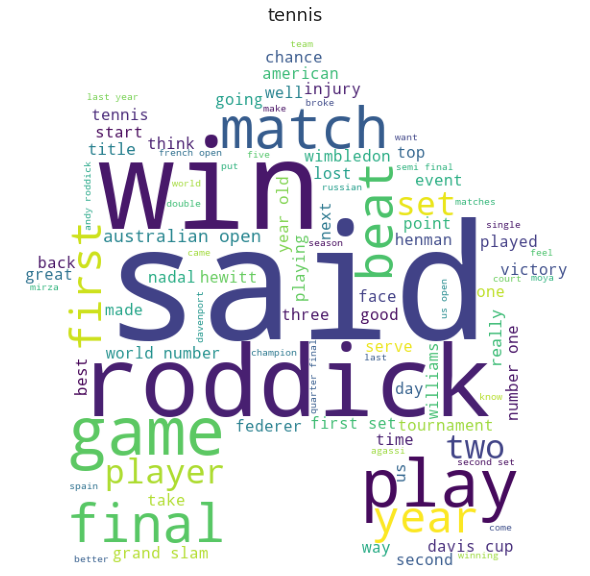

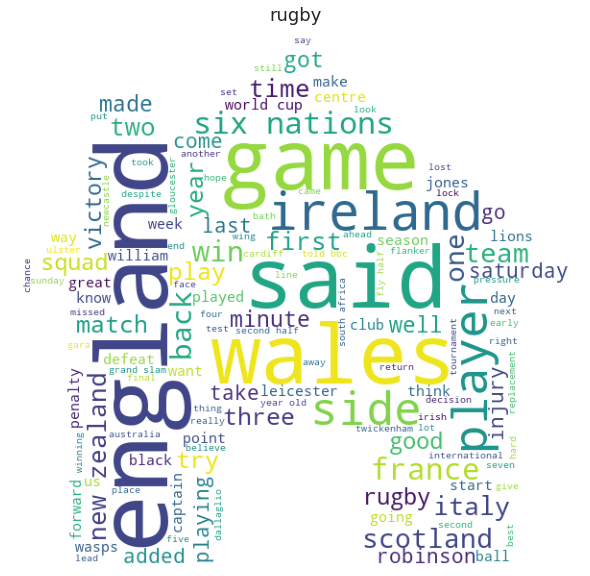

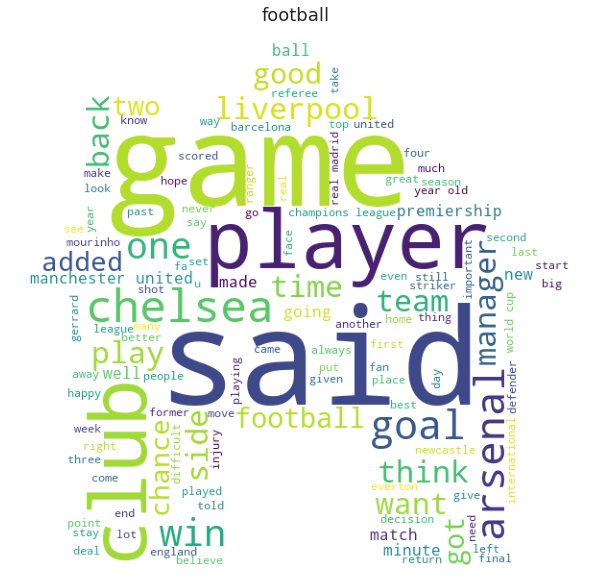

In [114]:
# Tracer le wordClouds pour les troix sports (tennis, rugby, football) 
wordClouds("tennis")
wordClouds("rugby")
wordClouds("football")

Cas: Football

Ce nuage de mots a été obtenu avec l'extraction des termes les plus pertinents qui décrivent les text de Football: said, plair, game, arsenal, chelsea, liverpool,  ..., etc.

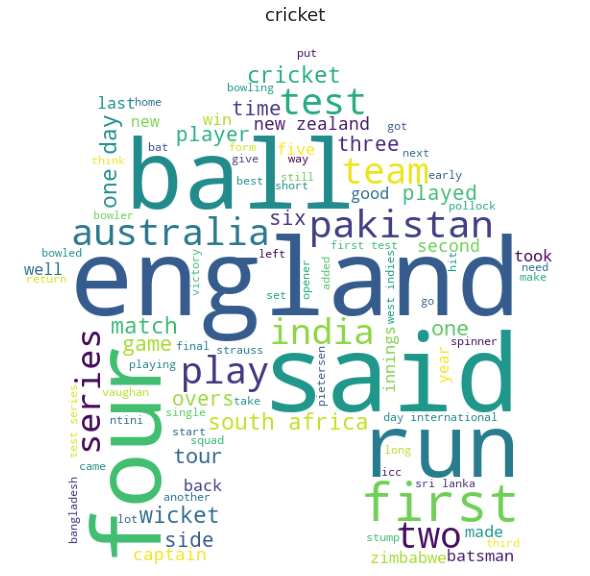

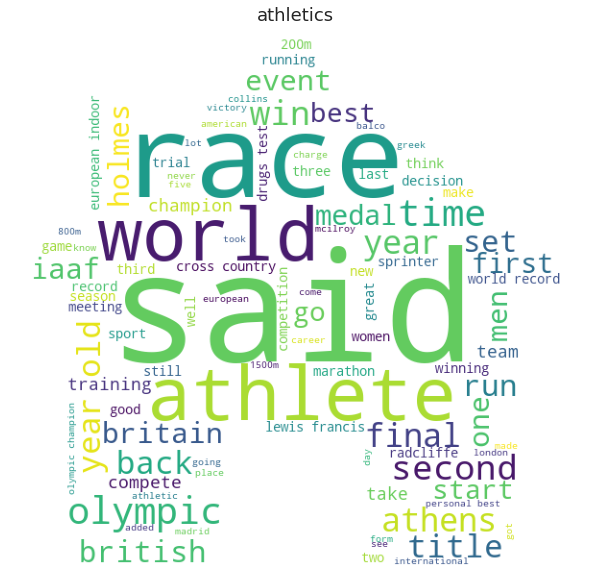

In [115]:
# Tracer le wordClouds pour les deux sports (cricket, athletics)
wordClouds("cricket")
wordClouds("athletics")

Selon ces Word Clouds, on constate que les textes pour les types de sport: athletics, rugby et tennis, partagent quelques  mots plus fréquents.

## 4. Préparation avec Transformation (Lemmatization et  Tokenisation)

Chercher de l'invariance dans le text avec la Lemmatization et la Tokenisation

In [116]:
#Lemmatizer avec Tokenisation pour le traitement du text
from textblob import TextBlob
import nltk

from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['text_tok_lim'] = df['text_nettoyer'].map(lambda x: 
                                             " ".join(lemmatizer.lemmatize(mot) for mot in TextBlob(x).words))
df.head()

,sport,text,text_nettoyer,text_tok_lim
0,cricket,Cricket coach moves on after tsunami\n\nWhen t...,cricket coach moves tsunami tsunami crashed on...,cricket coach move tsunami tsunami crashed ont...
1,tennis,Veteran Martinez wins Thai title\n\nConchita M...,veteran martinez wins thai title conchita mart...,veteran martinez win thai title conchita marti...
2,athletics,Kenteris denies faking road crash\n\nGreek spr...,kenteris denies faking road crash greek sprint...,kenteris denies faking road crash greek sprint...
3,rugby,Taylor poised for Scotland return\n\nSimon Tay...,taylor poised scotland return simon taylor nam...,taylor poised scotland return simon taylor nam...
4,football,Edu describes tunnel fracas\n\nArsenal\'s Edu ...,edu describes tunnel fracas arsenal edu lifted...,edu describes tunnel fracas arsenal edu lifted...


In [44]:
# Save data
#df.to_csv("data_cleand_tok_lim.csv", index=False)

In [45]:
#!pip install gensim

## 5. Feature engineering

### 5.1 Term Frequency (TF-IDF)

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(df['text_tok_lim'])

vectors = vectorizer.transform(df['text_tok_lim'])
feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist = dense.tolist()

X_texte = pd.DataFrame(denselist, columns=feature_names)
X_texte

,002,004secs,0100,019secs,02,0227,03,0315,04,0400,...,zoe,zogbia,zola,zondeki,zone,zornotza,ztl,zuluaga,zurich,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.07648,0.0,0.0,0.0,0.0,0.0
735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


####  Diviser les données (TF-IDF)

In [58]:
from sklearn.model_selection import train_test_split

y=df["sport"] 
X_train_TF_IDF, X_test_TF_IDF, y_train_TF_IDF, y_test_TF_IDF = train_test_split(X_texte, y, 
                                                                                test_size=0.20, random_state=42)

### 5.2 CountVectorizer (CT_VTR)

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

countVectors = CountVectorizer()

# tokenize et build vocab
countVectors.fit(df["text_tok_lim"])
countvect = countVectors.transform(df['text_tok_lim'])

dense = countvect.todense()
denselist = dense.tolist()

X_texte_CT_VTR = pd.DataFrame(denselist)
#X_texte_CT_VTR

####  Diviser les données (CT_VTR)

In [119]:
from sklearn.model_selection import train_test_split

y=df["sport"] 
X_train_CT_VTR, X_test_CT_VTR, y_train_CT_VTR, y_test_CT_VTR = train_test_split(X_texte_CT_VTR, y, 
                                                                                test_size=0.20, random_state=42)

### 5.3 Latent Dirichlet Allocation (LDA)

In [120]:
from sklearn.decomposition import LatentDirichletAllocation

# Word vectorization
countVectorizer = CountVectorizer()
countVectorizer.fit(df['text_tok_lim'])
termFrequency = countVectorizer.transform(df['text_tok_lim'])
featureNames = countVectorizer.get_feature_names()

# Appliquer l'algorithme Latent Dirichlet Allocation (lda) sur les vecteurs de mots
lda = LatentDirichletAllocation()
lda.fit(termFrequency)
lda_list = lda.transform(termFrequency).tolist()

# Créer lda X_texte DataFrame  
X_texte_lda = pd.DataFrame(lda_list)
#X_texte_lda

####  Diviser les données (LDA)

In [121]:
from sklearn.model_selection import train_test_split

y=df["sport"] 
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_texte_lda, y, 
                                                                                test_size=0.20, random_state=42)

## 6. Dévelopment de modèles

Car, je traite un problème de classification critique, j'ai besoin d'un modèle avec des performances élevées. Ici, je vais essayer 5 algorithmes d'apprentissage automatique, dans le but de chercher l'algorithme ML qui fonctionne le mieux. J'effectuerai une comparaison, basée sur plusieurs métriques, entre les modèles avec les 3 approches TF-IDF, CV, LDA.

Les algorithmes que je vais utiliser sont les suivants:

* GradientBoostingClassifier
* Naive_bayes (GaussianNB)
* AdaBoostClassifier
* RandomForestClassifier
* Xgboost

In [52]:
#!pip install xgboost

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from datetime import datetime


In [123]:
# Fonction timer
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        time = str(round(thour, 2))+":"+str(round(tmin, 2))+":"+str(round(tsec, 2))
        print('Temps pris: %i heures %i minutes et %s secondes.' % (thour, tmin, round(tsec, 4)))
    return time    

In [124]:
# Fonction de Matrice de confusion
def matrice_confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, 
                     xticklabels=y_test.unique(), 
                     yticklabels=y_test.unique(),
                     fmt='3d') # cells are counts
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Réel')

In [125]:
# Fonction pour le calcule des métriques
def print_metrics(y_test,y_pred):
    matrice_confusion(y_test, y_pred)
    f_score = np.round(f1_score(y_test, y_pred, average='micro'),3)
    print("F1_score sur le test set:",f_score, "\n")
    return f_score
    
# Fonction pour l'exécution des modèles et le calcule des métriques
def run_model(model, X_train, y_train, X_test, y_test):
    start_time = timer(None) # le timer train  commence à partir de ce point 
    model.fit(X_train, y_train)
    print("Dans le training:")
    time_train = timer(start_time) # le timer train se termine ici 
    print("Accuracy score sur le set training:", np.round(model.score(X_train, y_train),3),"\n ")
    start_time = timer(None) # le timer test  commence à partir de ce point 
    y_pred = model.predict(X_test)
    print("Dans le test:")
    time_test = timer(start_time) # le timer test se termine ici 
    acc_model = print_metrics(y_test,y_pred)
    return time_train, time_test, acc_model, model

### 6.1 GradientBoostingClassifier

#### 1. TF-IDF

Dans le training:
Temps pris: 0 heures 0 minutes et 30.2858 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.049 secondes.
F1_score sur le test set: 0.98 



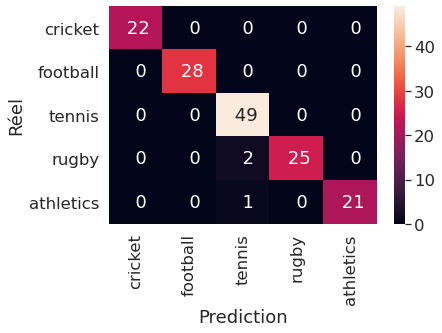

In [126]:
# GradientBoosting / TF-IDF 
time_trainGB_TfIdf, time_testGB_TfIdf, gb_f_score_TF_IDF ,GradientBoost_model_TF_IDF = run_model(GradientBoostingClassifier(random_state = 42),X_train_TF_IDF,
                                                       y_train_TF_IDF, X_test_TF_IDF, y_test_TF_IDF)

#### 2. CountVectorizer

Dans le training:
Temps pris: 0 heures 0 minutes et 26.5196 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.0466 secondes.
F1_score sur le test set: 0.986 



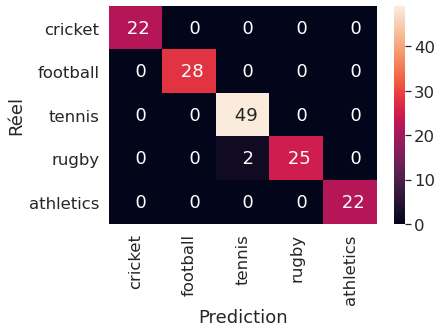

In [127]:
# GradientBoosting / CountVectorizer 
time_trainGB_CT_VTR, time_testGB_CT_VTR, gb_f_score_CT_VTR ,GradientBoost_model_CT_VTR = run_model(GradientBoostingClassifier(random_state = 42),X_train_CT_VTR,
                                                      y_train_CT_VTR, X_test_CT_VTR, y_test_CT_VTR)

#### 3. LDA

Dans le training:
Temps pris: 0 heures 0 minutes et 0.6953 secondes.
Accuracy score sur le set training: 0.993 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.0018 secondes.
F1_score sur le test set: 0.73 



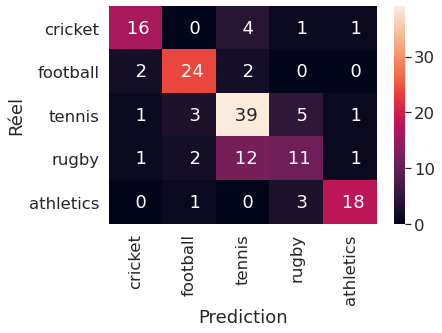

In [128]:
# GradientBoosting / LDA 
time_trainGB_LDA, time_testGB_LDA, gb_f_score_LDA ,GradientBoost_model_LDA = run_model(GradientBoostingClassifier(random_state = 42),X_train_LDA,
                                                      y_train_LDA, X_test_LDA, y_test_LDA)

### 6.2 Naive_bayes (GaussianNB)

#### 1. TF-IDF

Dans le training:
Temps pris: 0 heures 0 minutes et 0.1203 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.0789 secondes.
F1_score sur le test set: 0.946 



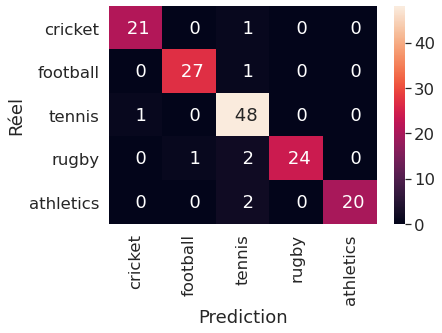

In [129]:
# GaussianNB / TF-IDF 
time_trainNb_TfIdf, time_testNb_TfIdf, nb_f_score_TF_IDF, NV_model_TF_IDF = run_model(GaussianNB(),X_train_TF_IDF, y_train_TF_IDF, 
                                           X_test_TF_IDF, y_test_TF_IDF)

#### 2. CountVectorizer

Dans le training:
Temps pris: 0 heures 0 minutes et 0.1238 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.0809 secondes.
F1_score sur le test set: 0.953 



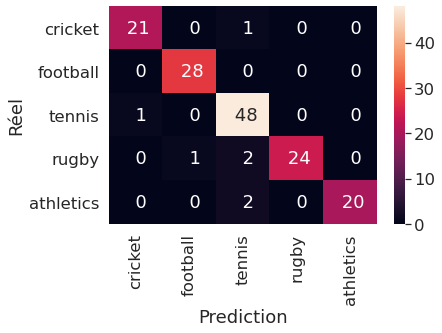

In [130]:
# GaussianNB / CountVectorizer 
time_trainNb_CT_VTR, time_testNb_CT_VTR, nb_f_score_CT_VTR, NV_model_CT_VTR = run_model(GaussianNB(),X_train_CT_VTR, y_train_CT_VTR, 
                                           X_test_CT_VTR, y_test_CT_VTR)

#### 3. LDA

Dans le training:
Temps pris: 0 heures 0 minutes et 0.0023 secondes.
Accuracy score sur le set training: 0.677 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.0011 secondes.
F1_score sur le test set: 0.655 



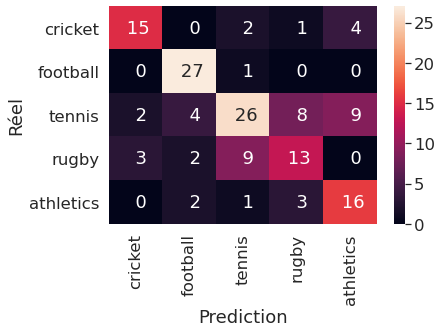

In [131]:
# GaussianNB / LDA 
time_trainNb_LDA, time_testNb_LDA, nb_f_score_LDA, NV_model_LDA = run_model(GaussianNB(),X_train_LDA, y_train_LDA, 
                                           X_test_LDA, y_test_LDA)

### 6.3 AdaBoostClassifier

#### 1. TF-IDF

Dans le training:
Temps pris: 0 heures 0 minutes et 2.0308 secondes.
Accuracy score sur le set training: 0.757 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.1327 secondes.
F1_score sur le test set: 0.736 



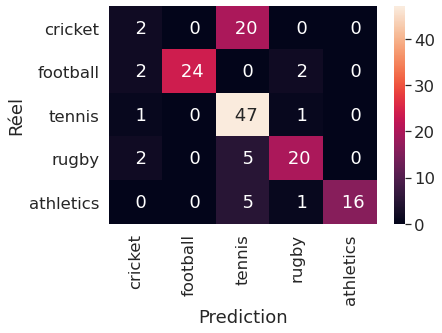

In [132]:
# AdaBoostClassifier / TF-IDF 
time_trainAda_TfIdf, time_testAda_TfIdf, ada_f_score_TF_IDF, AdaBoost_model_TF_IDF = run_model(AdaBoostClassifier(random_state = 42),X_train_TF_IDF, y_train_TF_IDF, 
                                  X_test_TF_IDF, y_test_TF_IDF)

#### 2. CountVectorizer

Dans le training:
Temps pris: 0 heures 0 minutes et 1.8669 secondes.
Accuracy score sur le set training: 0.667 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.1416 secondes.
F1_score sur le test set: 0.662 



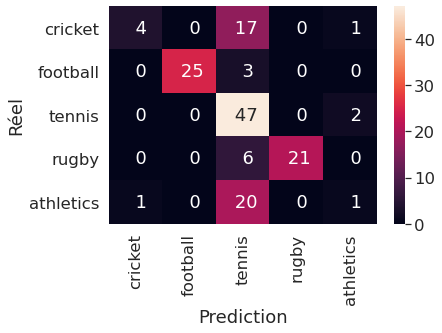

In [133]:
# AdaBoostClassifier / CountVectorizer 
time_trainAda_CT_VTR, time_testAda_CT_VTR, ada_f_score_CT_VTR, AdaBoost_model_CT_VTR = run_model(AdaBoostClassifier(random_state = 42),X_train_CT_VTR, 
                                                  y_train_CT_VTR, X_test_CT_VTR, y_test_CT_VTR)

#### 3. LDA

Dans le training:
Temps pris: 0 heures 0 minutes et 0.0769 secondes.
Accuracy score sur le set training: 0.623 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.0058 secondes.
F1_score sur le test set: 0.628 



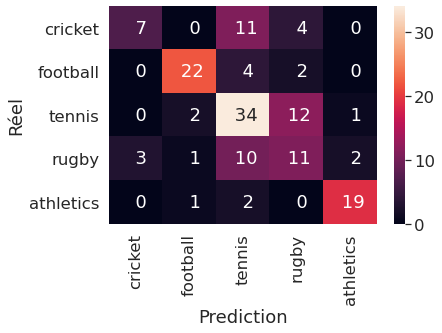

In [134]:
# AdaBoostClassifier / LDA 
time_trainAda_LDA, time_testAda_LDA, ada_f_score_LDA, AdaBoost_model_LDA = run_model(AdaBoostClassifier(random_state = 42),X_train_LDA, 
                                                  y_train_LDA, X_test_LDA, y_test_LDA)

### 6.4 RandomForestClassifier

#### 1. TF-IDF

Dans le training:
Temps pris: 0 heures 0 minutes et 0.4906 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.05 secondes.
F1_score sur le test set: 0.946 



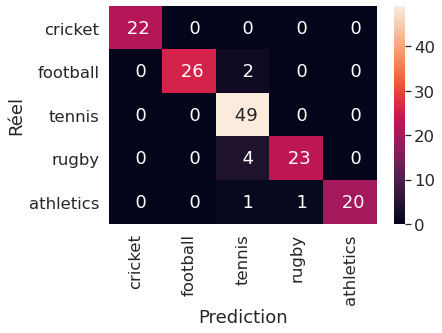

In [135]:
# RandomForestClassifier / TF-IDF 
time_trainGRf_TfIdf, time_testRF_TfIdf, rf_f_score_TF_IDF, RF_model_TF_IDF = run_model(RandomForestClassifier(random_state = 42),X_train_TF_IDF, 
                                           y_train_TF_IDF, X_test_TF_IDF, y_test_TF_IDF)

#### 2. CountVectorizer

Dans le training:
Temps pris: 0 heures 0 minutes et 0.49 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.0504 secondes.
F1_score sur le test set: 0.939 



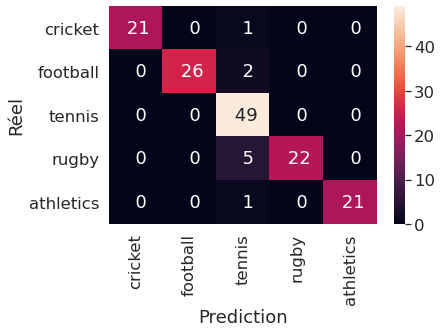

In [136]:
# RandomForestClassifier / CountVectorizer 
time_trainRf_CT_VTR, time_testRf_CT_VTR, rf_f_score_CT_VTR, RF_model_CT_VTR = run_model(RandomForestClassifier(random_state = 42),X_train_CT_VTR, 
                                           y_train_CT_VTR, X_test_CT_VTR, y_test_CT_VTR)

#### 3. LDA

Dans le training:
Temps pris: 0 heures 0 minutes et 0.1356 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.0074 secondes.
F1_score sur le test set: 0.696 



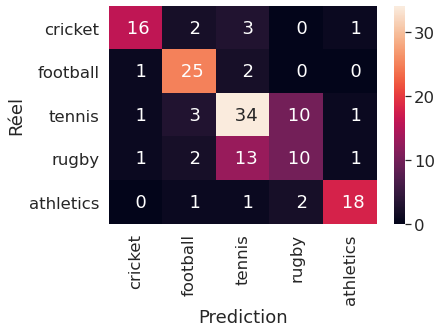

In [137]:
# RandomForestClassifier / LDA 
time_trainRf_LDA, time_testRf_LDA, rf_f_score_LDA, RF_model_LDA = run_model(RandomForestClassifier(random_state = 42),X_train_LDA, 
                                           y_train_LDA, X_test_LDA, y_test_LDA)

### 6.4 Xgboost

#### 1. TF-IDF

[18:09:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Dans le training:
Temps pris: 0 heures 0 minutes et 7.3347 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.1988 secondes.
F1_score sur le test set: 0.98 



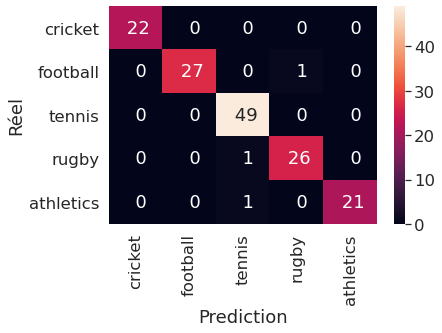

In [138]:
# xgboost / TF-IDF 
time_trainXgb_TfIdf, time_testXgb_TfIdf, xgb_f_score_TF_IDF, xgboost_model_TF_IDF = run_model(xgboost.XGBClassifier(random_state = 42),X_train_TF_IDF, 
                                                 y_train_TF_IDF, X_test_TF_IDF, y_test_TF_IDF)

#### 2. CountVectorizer

[18:09:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Dans le training:
Temps pris: 0 heures 0 minutes et 7.0134 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.1563 secondes.
F1_score sur le test set: 0.986 



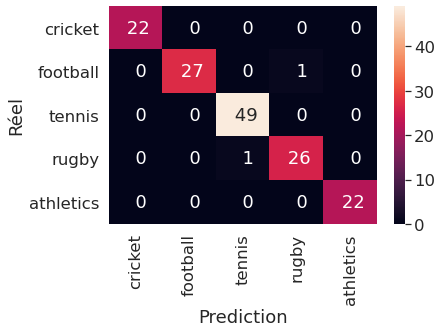

In [139]:
# xgboost / CountVectorizer 
time_trainXgb_CT_VTR, time_testXgb_CT_VTR, xgb_f_score_CT_VTR, xgboost_model_CT_VTR = run_model(xgboost.XGBClassifier(random_state = 42),X_train_CT_VTR, 
                                                 y_train_CT_VTR, X_test_CT_VTR, y_test_CT_VTR)

#### 3. LDA

[18:09:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Dans le training:
Temps pris: 0 heures 0 minutes et 0.2448 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.0012 secondes.
F1_score sur le test set: 0.757 



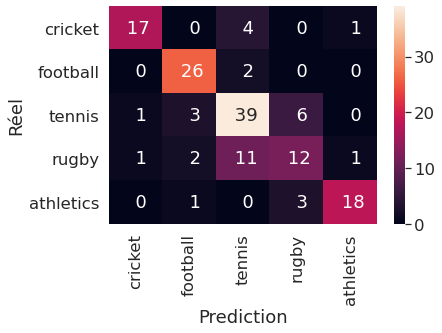

In [140]:
# xgboost / LDA 
time_trainXgb_LDA, time_testXgb_LDA, xgb_f_score_LDA, xgboost_model_LDA = run_model(xgboost.XGBClassifier(random_state = 42),X_train_LDA, 
                                                 y_train_LDA, X_test_LDA, y_test_LDA)

### Comparaison entre les modèles (Temps pour training)

In [141]:
# Temps pour training
models = ['Naive bayes', 'AdaBoost', 'GradientBoosting', 'Random Forest', 'xgboost']
Tp_Train_TF_IDF = [time_trainGB_TfIdf, time_trainNb_TfIdf, time_trainAda_TfIdf, time_trainRf_LDA, time_trainXgb_TfIdf]
Tp_Train_CT_VTR = [time_trainGB_CT_VTR, time_trainNb_CT_VTR, time_trainAda_CT_VTR, time_trainRf_CT_VTR, time_trainXgb_CT_VTR]
Tp_Train_LDA = [time_trainGB_LDA, time_trainNb_LDA, time_trainAda_LDA, time_trainRf_LDA, time_trainXgb_LDA]

d = {'Tp_Train_TF_IDF': Tp_Train_TF_IDF, 'Tp_Train_CT_VTR': Tp_Train_CT_VTR, 'Tp_Train_LDA': Tp_Train_LDA}
df_temps_train = pd.DataFrame(d, index = models)
df_temps_train

,Tp_Train_TF_IDF,Tp_Train_CT_VTR,Tp_Train_LDA
Naive bayes,0.0:0.0:30.29,0.0:0.0:26.52,0.0:0.0:0.7
AdaBoost,0.0:0.0:0.12,0.0:0.0:0.12,0.0:0.0:0.0
GradientBoosting,0.0:0.0:2.03,0.0:0.0:1.87,0.0:0.0:0.08
Random Forest,0.0:0.0:0.14,0.0:0.0:0.49,0.0:0.0:0.14
xgboost,0.0:0.0:7.33,0.0:0.0:7.01,0.0:0.0:0.24


### Comparaison entre les modèles (Temps pour la prédiction)

In [142]:
# Temps pour la prédiction
models = ['Naive bayes', 'AdaBoost', 'GradientBoosting', 'Random Forest', 'xgboost']
Tp_test_TF_IDF = [time_testGB_TfIdf, time_testNb_TfIdf, time_testAda_TfIdf, time_testRf_LDA, time_testXgb_TfIdf]
Tp_test_CT_VTR = [time_testGB_CT_VTR, time_testNb_CT_VTR, time_testAda_CT_VTR, time_testRf_CT_VTR, time_testXgb_CT_VTR]
Tp_test_LDA = [time_testGB_LDA, time_testNb_LDA, time_testAda_LDA, time_testRf_LDA, time_testXgb_LDA]

d = {'Tp_test_TF_IDF': Tp_test_TF_IDF, 'Tp_test_CT_VTR': Tp_test_CT_VTR, 'Tp_test_LDA': Tp_test_LDA}
df_temps_test = pd.DataFrame(d, index = models)
df_temps_test

,Tp_test_TF_IDF,Tp_test_CT_VTR,Tp_test_LDA
Naive bayes,0.0:0.0:0.05,0.0:0.0:0.05,0.0:0.0:0.0
AdaBoost,0.0:0.0:0.08,0.0:0.0:0.08,0.0:0.0:0.0
GradientBoosting,0.0:0.0:0.13,0.0:0.0:0.14,0.0:0.0:0.01
Random Forest,0.0:0.0:0.01,0.0:0.0:0.05,0.0:0.0:0.01
xgboost,0.0:0.0:0.2,0.0:0.0:0.16,0.0:0.0:0.0


### Comparaison entre les modèles  sur le test set avec la métrique f1 score

In [93]:
models = ['Naive bayes', 'AdaBoost', 'GradientBoosting', 'Random Forest', 'xgboost']
f1_score_TF_IDF = [nb_f_score_TF_IDF, ada_f_score_TF_IDF, gb_f_score_TF_IDF, rf_f_score_TF_IDF, xgb_f_score_TF_IDF]
f1_score_CT_VTR = [nb_f_score_CT_VTR, ada_f_score_CT_VTR, gb_f_score_CT_VTR, rf_f_score_CT_VTR, xgb_f_score_CT_VTR]
f1_score_LDA = [nb_f_score_LDA, ada_f_score_LDA, gb_f_score_LDA, rf_f_score_LDA, xgb_f_score_LDA]

d = {'f1_score_TF_IDF': f1_score_TF_IDF, 'f1_score_CT_VTR': f1_score_CT_VTR, 'f1_score_LDA': f1_score_LDA}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,f1_score_TF_IDF,f1_score_CT_VTR,f1_score_LDA
Naive bayes,0.946,0.953,0.696
AdaBoost,0.750,0.662,0.669
GradientBoosting,0.980,0.986,0.811
Random Forest,0.959,0.939,0.824
xgboost,0.973,0.986,0.818


In [124]:
print("les/le maximale f1 score pour chaque série de df_metrics","\n")
for col in df_metrics.columns:
    print(df_metrics[df_metrics[col] == df_metrics[col].max()][col], "\n")

les/le maximale f1 score pour chaque série de df_metrics 

GradientBoosting    0.98
Name: f1_score_TF_IDF, dtype: float64 

GradientBoosting    0.986
xgboost             0.986
Name: f1_score_CT_VTR, dtype: float64 

GradientBoosting    0.77
Random Forest       0.77
Name: f1_score_LDA, dtype: float64 



On remarque que l'algorithme de "Gradient Boosting" donne le meilleur score (f1_score) par rapport aux autres modèles quel que soit le type d'extraction de caractéristiques utilisé.

À partir de cette étape, nous allons travailler juste avec le classificateur GradientBoosting afin d'améliorer son score,et en se basant sur l'optimisation des hyperparamètres de TF IDF et CT_VTR.

## 7. Implémentation du réglage des hyperparamètres pour TF-IDF et CT_VTR

Ici, nous allons voir comment nous pouvons obtenir des valeurs optimales pour les paramètres TF-IDF et CT_VTR. La méthode de réglage des hyperparamètres * GridSearchCV * sera utilisée dans ce processus.

In [83]:
# Spliter data entre train et test pour utiliser les données du train dans l'optimisation de hyperparamètres
y = df["sport"] 
X = df['text_tok_lim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 7.1 Réglage des hyperparamètres TF-IDF

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', GradientBoostingClassifier(random_state = 42))
])

parameters = {
    'tfidf__max_df': (0.1, 0.5, 10),
    'tfidf__binary': [True, False],
    'tfidf__norm': [None, 'l1', 'TF-IDFl2'], 
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)

start_time = timer(None) # le timer test commence à parti de ce point 
grid_search_tune.fit(X_train, y_train)
print("Dans le test:")
time_TF_IDF = timer(start_time) # le timer test se termine ici 
    
print("Meilleur paramètres set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   25.8s
[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:   29.3s finished


Dans le test:
Temps pris: 0 heures 0 minutes et 33.2465 secondes.
Meilleur paramètres set:
[('tfidf', TfidfVectorizer(max_df=0.5, norm=None)), ('clf', GradientBoostingClassifier(random_state=42))]


In [268]:
# Meilleurs paramètres set:
# TfidfVectorizer(binary=True, ngram_range=(1,1), max_df=0.5, norm=None))

### Term Frequency optimisée (TF-IDF)

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(binary=True, max_df=0.5, norm=None)
vectorizer.fit(df['text_tok_lim'])

vectors = vectorizer.transform(df['text_tok_lim'])
feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist = dense.tolist()

X_texte = pd.DataFrame(denselist, columns=feature_names)
#X_texte

#### Spliter data entre train et test basé sur TF-IDF optimisée

In [144]:
y=df["sport"] 
X_train_TF_IDF, X_test_TF_IDF, y_train_TF_IDF, y_test_TF_IDF = train_test_split(X_texte, y, 
                                                                                test_size=0.20, random_state=42)

### Tester Gradient Boosting avec TF-IDF optimisé

Dans le training:
Temps pris: 0 heures 0 minutes et 25.5122 secondes.
Accuracy score sur le set training: 1.0 
 
Dans le test:
Temps pris: 0 heures 0 minutes et 0.0471 secondes.
F1_score sur le test set: 0.986 



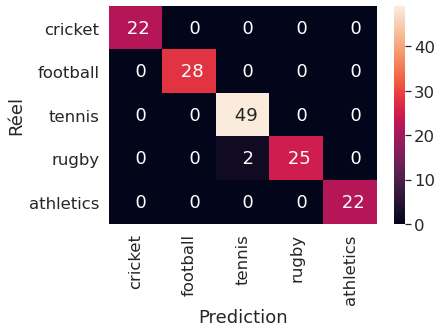

In [145]:
# GradientBoosting / TF-IDF 
time_trainGB_TfIdf, time_testGB_TfIdf, gb_acc_TF_IDF ,GradientBoost_model_TF_IDF_Optimise = run_model(GradientBoostingClassifier(random_state = 42),X_train_TF_IDF,
                                                       y_train_TF_IDF, X_test_TF_IDF, y_test_TF_IDF)

Nous pouvons voir dans les sorties ci-dessus (Matrice de confusion) qu'il 'y a une amélioration pour le modèle GradientBoosting basé sur TF-IDF optimisé par +0.6% (0.98 Vs 0.986). 

### 7.2 Réglage CountVectorizer hyperparamètres CT_VTR

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('CT_VTR', CountVectorizer()),
    ('clf', GradientBoostingClassifier(random_state = 42))
])


parameters = {
    'CT_VTR__ngram_range': [(1,1), (1,2), (1,3)], # ngram range of tokenizer
    'CT_VTR__max_df':[0.1, 0.5, 10] # maximum document frequency for the CountVectorizer
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)

start_time = timer(None) # le timer test  commence à partir de ce point 
grid_search_tune.fit(X_train, y_train)
print("Dans le test:")
time_TF_IDF = timer(start_time) # le timer test se termine ici 

print("Meilleur paramètres set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:  1.4min finished


Dans le test:
Temps pris: 0 heures 1 minutes et 30.4969 secondes.
Meilleur paramètres set:
[('CT_VTR', CountVectorizer(max_df=0.5)), ('clf', GradientBoostingClassifier(random_state=42))]


In [326]:
# Meilleurs paramètres set:
# CountVectorizer(max_df=0.5)

### CountVectorizer optimisée (CT_VTR)

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

countVectors = CountVectorizer(max_df=0.5)

# tokenize et build vocab
countVectors.fit(df["text_tok_lim"])
countvect = countVectors.transform(df['text_tok_lim'])

dense = countvect.todense()
denselist = dense.tolist()

X_texte_CT_VTR = pd.DataFrame(denselist)
#X_texte_CT_VTR

#### Spliter data entre train et test basé sur CT_VTR optimisé

In [129]:
y=df["sport"] 
X_train_CT_VTR, X_test_CT_VTR, y_train_CT_VTR, y_test_CT_VTR = train_test_split(X_texte_CT_VTR, y, 
                                                                                test_size=0.20, random_state=42)

Dans le training:
Temps pris: 0 heures 0 minutes et 26.3425 secondes.

Dans le test:
Temps pris: 0 heures 0 minutes et 0.048 secondes.

f1_score est : 0.986 



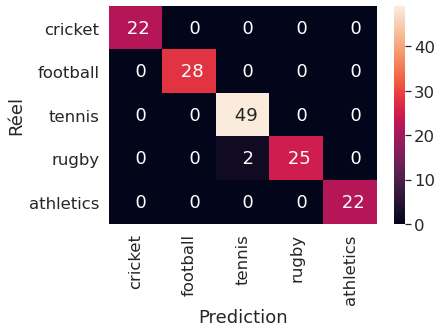

In [130]:
# GradientBoosting / CountVectorizer 
time_trainGB_CT_VTR, time_testGB_CT_VTR, gb_acc_CT_VTR ,GradientBoost_model_CT_VTR_Optimise = run_model(GradientBoostingClassifier(random_state = 42),X_train_CT_VTR,
                                                      y_train_CT_VTR, X_test_CT_VTR, y_test_CT_VTR)

Nous pouvons voir dans les sorties ci-dessus (Matrice de confusion) qu'il n'y a pas une amélioration pour le modèle GradientBoosting basé sur CT_VTR optimisé (0.986 Vs 0.986). 

### 7.3 Note sur les résultats de l'optimisation des hyperparamètres

Après l'optimisation des hyperparamètres de CountVectorizer CT_VTR et TF-IDF pour l'algorithme "Gradient Boosting", on constate que les deux modèles optimisés donnent la même valeur de f1_score:

f1_score(): GradientBoost_model_TF_IDF_Optimise = 0.986  

f1_score(): GradientBoost_model_CT_VTR_Optimise = 0.986   

Lors de la prochaine étape de validation, nous conservons simplement l'un des deux modèlesc

## 8. Code pour la validation sur un sous-ensemble de données cachées


Dans cet exemple, je vous montrerai les étapes à suivre(Code) pour valider la performance modèle trouvé sur un sous-ensemble de données cachées (des fichiers txt à partir d'un dossier (sous un nom inconnu))

In [331]:
# Création d'un dataframe pour un type de sport
def sport_df(Splist, Rpsport, path_sport):
    txt_list = list()
    for txt_file in Splist:
        # Read txt file
        f = open(path_sport+"/"+txt_file, "rb")
        # Ajouter le txt à la liste
        txt_list.append(str(f.read()))
        #print(f.read())
    df = pd.DataFrame({"sport": Rpsport, "text": txt_list})
    return df

In [333]:
# Création d'un dataframe pour tout les la validation
def creation_df(racine):
    # Dataframe vide (df résultat) 
    data = pd.DataFrame({"sport": [], "text": []})
    # path de répertoire test
    path_sport = os.getcwd()+"/"+racine
    #print(" path racine:",path_sport)

    if os.path.isdir(path_sport):
        #print("\n Répertoire :", repertoire_sport, "\n" )  
        # Lister tout les nom de tout les fichiers txt dans chaque répertoire
        sport_list = os.listdir(path_sport)
        #print(sport_list)
        # Lire chaque fichier dans un répertoire de sport
        data = sport_df(sport_list, racine, path_sport)

    # remplacer b' par un vide
    data['text'] = data['text'].map(lambda x: x.replace("b'",""))
    # rest index 
    data.reset_index( drop= True, inplace=True)
    return data

#### A. Chargemenet de données

In [334]:
# Chargement des fichier text depuis le dossier racine "inconnu" et Affichage des données "df"  
dossier_racine = "inconnu"
df = creation_df(dossier_racine)
df.head()

,sport,text
0,inconnu,Man Utd stroll to Cup win\n\nWayne Rooney made...
1,inconnu,Van Nistelrooy set to return\n\nManchester Uni...
2,inconnu,Henman overcomes rival Rusedski\n\nTim Henman ...
3,inconnu,"b""O'Sullivan could run in Worlds\n\nSonia O'Su..."
4,inconnu,Claxton hunting first major medal\n\nBritish h...


#### B. Nettoyage 

In [336]:
import re
import string 

df["text_nettoyer"] = df["text"].map(lambda x: x.lower())

# Remplacement de la ponctuation basée sur des opérations d'expressions régulières
df["text_nettoyer"] = df['text_nettoyer'].map(lambda x: re.sub(r'\'|\\n\\n| n |\\n|\\|-',' ',x))

# Remplacer deux éspaces par un seul éspace
df["text_nettoyer"] = df['text_nettoyer'].map(lambda x: x.replace('  ', ' '))

# Supprimer la ponctuation basé sur string.punctuation (string.punctuation == !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)
df["text_nettoyer"] = df["text_nettoyer"].map(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
bbcsport
df.head(5)

,sport,text,text_nettoyer
0,inconnu,Man Utd stroll to Cup win\n\nWayne Rooney made...,man utd stroll to cup win wayne rooney made a ...
1,inconnu,Van Nistelrooy set to return\n\nManchester Uni...,van nistelrooy set to return manchester united...
2,inconnu,Henman overcomes rival Rusedski\n\nTim Henman ...,henman overcomes rival rusedski tim henman sav...
3,inconnu,"b""O'Sullivan could run in Worlds\n\nSonia O'Su...",bo sullivan could run in worlds sonia o sulliv...
4,inconnu,Claxton hunting first major medal\n\nBritish h...,claxton hunting first major medal british hurd...


In [337]:
# stop words
from nltk.corpus import stopwords
import nltk

#nltk.download("stopwords")
mots_stop = stopwords.words('english')

#Supprimer les stopwords
df["text_nettoyer"] = df["text_nettoyer"].map(lambda x: " ".join([mot for mot in x.split() if not mot in mots_stop])) 

#### C. Préparation avec Transformation

In [91]:
#Lemmatizeation avec Tokenisation
from textblob import TextBlob
import nltk

from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['text_tok_lim'] = df['text_nettoyer'].map(lambda x: 
                                             " ".join(lemmatizer.lemmatize(mot) for mot in TextBlob(x).words))
df.head()

,sport,text,text_nettoyer,text_tok_lim
0,cricket,Cricket coach moves on after tsunami\n\nWhen t...,cricket coach moves tsunami tsunami crashed on...,cricket coach move tsunami tsunami crashed ont...
1,tennis,Veteran Martinez wins Thai title\n\nConchita M...,veteran martinez wins thai title conchita mart...,veteran martinez win thai title conchita marti...
2,athletics,Kenteris denies faking road crash\n\nGreek spr...,kenteris denies faking road crash greek sprint...,kenteris denies faking road crash greek sprint...
3,rugby,Taylor poised for Scotland return\n\nSimon Tay...,taylor poised scotland return simon taylor nam...,taylor poised scotland return simon taylor nam...
4,football,Edu describes tunnel fracas\n\nArsenal\'s Edu ...,edu describes tunnel fracas arsenal edu lifted...,edu describes tunnel fracas arsenal edu lifted...


#### D. Feature engennering

In [340]:
# Term Frequency (TF-IDF)
vectors = vectorizer.transform(df['text_tok_lim'])
feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist = dense.tolist()

X_texte_Tf_Idf = pd.DataFrame(denselist, columns=feature_names)
X_texte_Tf_Idf

,002,004secs,0100,019secs,02,0227,03,0315,04,0400,...,zoe,zogbia,zola,zondeki,zone,zornotza,ztl,zuluaga,zurich,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### E. Tester les données avec le modèle optimisé GradientBoost_TF_IDF

In [341]:
# Tester le modele GradientBoost_TF_IDF_Optimise
GradientBoost_model_TF_IDF_Optimise.predict(X_texte_Tf_Idf)

array(['football', 'football', 'tennis', 'athletics', 'athletics'],
      dtype=object)